## My first project    
    


In [3]:
import pandas as pd


In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

In [7]:
%matplotlib inline

### Data import & merge

In [8]:
admin = pd.read_csv("C:/Users/FUGE/Desktop/PROJECT/bill_id.csv")
admin.shape

(13600, 3)

In [9]:
admin.head()

,bill_id,patient_id,date_of_admission
0,7968360812,1d21f2be18683991eb93d182d6b2d220,2011-01-01
1,6180579974,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01
2,7512568183,1d21f2be18683991eb93d182d6b2d220,2011-01-01
3,3762633379,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01
4,7654730355,1d21f2be18683991eb93d182d6b2d220,2011-01-01


In [10]:
billamt = pd.read_csv("C:/Users/FUGE/Desktop/PROJECT/bill_amount.csv")
billamt.shape

(13600, 2)

In [11]:
billamt.head()

,bill_id,amount
0,40315104,1552.634830
1,2660045161,1032.011951
2,1148334643,6469.605351
3,3818426276,755.965425
4,9833541918,897.347816


In [12]:
demogra = pd.read_csv("C:/Users/FUGE/Desktop/PROJECT/demographics.csv")
demogra.shape

(3000, 5)

In [13]:
demogra.head()

,patient_id,gender,race,resident_status,date_of_birth
0,fa2d818b2261e44e30628ad1ac9cc72c,Female,Indian,Singaporean,1971-05-14
1,5b6477c5de78d0b138e3b0c18e21d0ae,f,Chinese,Singapore citizen,1976-02-18
2,320aa16c61937447fd6631bf635e7fde,Male,Chinese,Singapore citizen,1982-07-03
3,c7f3881684045e6c49020481020fae36,Male,Malay,Singapore citizen,1947-06-15
4,541ad077cb4a0e64cc422673afe28aef,m,Chinese,Singaporean,1970-12-12


In [14]:
clinic = pd.read_csv("C:/Users/FUGE/Desktop/PROJECT/clinical_data.csv")
clinic.shape

(3400, 26)

In [15]:
clinic.head()

,id,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,...,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height
0,1d21f2be18683991eb93d182d6b2d220,2011-01-01,2011-01-11,0,1.0,0,0,0.0,0,0,...,0,0,0,1,1,13.2,30.9,123.0,71.3,161.0
1,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01,2011-01-11,0,0.0,0,0,0.0,0,0,...,0,0,1,1,1,13.8,22.6,89.0,78.4,160.0
2,c85cf97bc6307ded0dd4fef8bad2fa09,2011-01-02,2011-01-13,0,0.0,0,0,0.0,0,0,...,1,1,1,1,0,11.2,26.2,100.0,72.0,151.0
3,e0397dd72caf4552c5babebd3d61736c,2011-01-02,2011-01-14,0,1.0,No,0,0.0,1,1,...,1,1,1,1,1,13.3,28.4,76.0,64.4,152.0
4,94ade3cd5f66f4584902554dff170a29,2011-01-08,2011-01-16,0,0.0,No,0,0.0,1,1,...,0,1,0,1,0,12.0,27.8,87.0,55.6,160.0


In [16]:
billpa = pd.merge(admin,billamt, on = 'bill_id' ) #bill_id inner join bill_amount

In [17]:
billpa.shape
len(billpa.patient_id.unique())

3000

In [18]:
billpa.head()

,bill_id,patient_id,date_of_admission,amount
0,7968360812,1d21f2be18683991eb93d182d6b2d220,2011-01-01,951.214467
1,6180579974,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01,19900.297086
2,7512568183,1d21f2be18683991eb93d182d6b2d220,2011-01-01,12338.269972
3,3762633379,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01,1145.372193
4,7654730355,1d21f2be18683991eb93d182d6b2d220,2011-01-01,1133.601902


In [19]:
billpa.count() #confirm no NA value

bill_id              13600
patient_id           13600
date_of_admission    13600
amount               13600
dtype: int64

In [20]:
len(billpa.bill_id.unique()) # no duplicate bill_Id

13600

In [21]:
features = pd.merge(demogra,clinic,left_on = 'patient_id',right_on = 'id',how='inner') 
#join demographic,clinical data, id different use left_on, right_on
features.shape  

(3400, 31)

In [22]:
len(clinic.id.unique()) #check number of unique value in clinic.id, so some of the patients 
                        #came to clinic more than onece

3000

In [23]:
features = pd.merge(demogra,clinic,left_on = 'patient_id',right_on = 'id',how='left') 
#this time use left join only on demographic patient_id

In [24]:
features.shape #some duplicate patient id, take note can try with/without duplicate when M L

(3400, 31)

In [25]:
features.columns

Index(['patient_id', 'gender', 'race', 'resident_status', 'date_of_birth',
       'id', 'date_of_admission', 'date_of_discharge', 'medical_history_1',
       'medical_history_2', 'medical_history_3', 'medical_history_4',
       'medical_history_5', 'medical_history_6', 'medical_history_7',
       'preop_medication_1', 'preop_medication_2', 'preop_medication_3',
       'preop_medication_4', 'preop_medication_5', 'preop_medication_6',
       'symptom_1', 'symptom_2', 'symptom_3', 'symptom_4', 'symptom_5',
       'lab_result_1', 'lab_result_2', 'lab_result_3', 'weight', 'height'],
      dtype='object')

In [26]:
features.drop('id',axis=1,inplace = True) #drop ID, left with patient_Id

In [27]:
features.shape 

(3400, 30)

In [28]:
clinicmer = pd.merge(billpa,features,on = ['patient_id','date_of_admission'],how = 'right')

In [29]:
clinicmer.shape #so the whole story is that, one patient may came to the clinic more than once.
#each time may have several differnet bills 3000 patients -->3400 times admission --> 13600 bills in total

(13600, 32)

 ### Some insights, the 13600 bills should be grouped by patient & admission

In [30]:
#set seaborn plot styles
sns.axes_style()
sns.set_context("poster")
plt.figure(figsize = (12,9))

In [31]:
clinicmer.columns #clinicmer stores all the info

Index(['bill_id', 'patient_id', 'date_of_admission', 'amount', 'gender',
       'race', 'resident_status', 'date_of_birth', 'date_of_discharge',
       'medical_history_1', 'medical_history_2', 'medical_history_3',
       'medical_history_4', 'medical_history_5', 'medical_history_6',
       'medical_history_7', 'preop_medication_1', 'preop_medication_2',
       'preop_medication_3', 'preop_medication_4', 'preop_medication_5',
       'preop_medication_6', 'symptom_1', 'symptom_2', 'symptom_3',
       'symptom_4', 'symptom_5', 'lab_result_1', 'lab_result_2',
       'lab_result_3', 'weight', 'height'],
      dtype='object')

In [32]:
clinicmer =clinicmer.sort_values(by = ['patient_id','date_of_admission']) #order by patients and date of admission,

In [33]:
adminfee = clinicmer.groupby(by = ['patient_id','date_of_admission'])['amount'].sum() 
#group sum to compute patient total cost in each admission

In [34]:
adminfee= pd.DataFrame(adminfee)
adminfee=adminfee.reset_index(level=['patient_id','date_of_admission']) #after the series changed to DF,
#id and date of admission are index, cannot join, so convert to colomuns

In [35]:
adminfee.head()

,patient_id,date_of_admission,amount
0,00225710a878eff524a1d13be817e8e2,2014-04-10,5190.566695
1,0029d90eb654699c18001c17efb0f129,2012-11-07,22601.497872
2,0040333abd68527ecb53e1db9073f52e,2013-01-19,17447.181635
3,00473b58e3dc8ae37b3cb34069705083,2014-02-10,15285.883220
4,0078662d1d983dde68ea057c42d5b5cf,2012-04-28,73477.869010


In [36]:
adminfee.amount.describe() #total cost for each admission,basic stats

count     3400.000000
mean     21859.071130
std      10155.336753
min       2946.100354
25%      14793.370831
50%      20180.020614
75%      26680.292435
max      98723.854994
Name: amount, dtype: float64

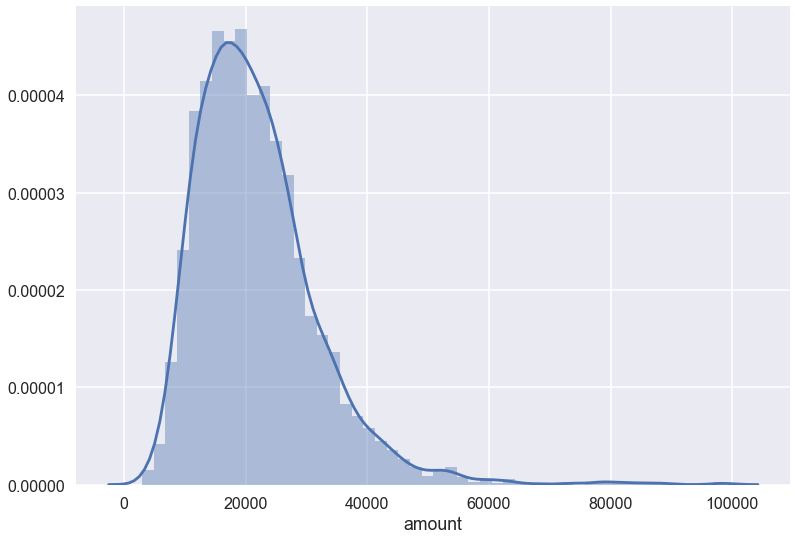

In [37]:
sns.distplot(adminfee.amount,rug= False) 
#the total cost for each admission looks like skewed normal distribution
#just plot for analysis use, not the final plot for presentation

In [38]:
adminfee.rename(columns={'amount':'totalamt'},inplace = True) #change for better understanding

In [39]:
adminfee.head()

,patient_id,date_of_admission,totalamt
0,00225710a878eff524a1d13be817e8e2,2014-04-10,5190.566695
1,0029d90eb654699c18001c17efb0f129,2012-11-07,22601.497872
2,0040333abd68527ecb53e1db9073f52e,2013-01-19,17447.181635
3,00473b58e3dc8ae37b3cb34069705083,2014-02-10,15285.883220
4,0078662d1d983dde68ea057c42d5b5cf,2012-04-28,73477.869010


In [40]:
finalx = pd.merge(adminfee,features,on=['patient_id','date_of_admission']) 
#merge total amount,clinical data, patient demographic all together, 3400 examples
finalx.shape

(3400, 31)

In [41]:
finalx =finalx.sort_values(by=['patient_id','date_of_admission']) #order

# Until now data all merged, 3400 examples for model training

 ## Now data cleaning, deal with NA. etc


In [42]:
#For NA value count
finalx.count()
#medical_history_2,medical_history_5 got NA values

patient_id            3400
date_of_admission     3400
totalamt              3400
gender                3400
race                  3400
resident_status       3400
date_of_birth         3400
date_of_discharge     3400
medical_history_1     3400
medical_history_2     3167
medical_history_3     3400
medical_history_4     3400
medical_history_5     3096
medical_history_6     3400
medical_history_7     3400
preop_medication_1    3400
preop_medication_2    3400
preop_medication_3    3400
preop_medication_4    3400
preop_medication_5    3400
preop_medication_6    3400
symptom_1             3400
symptom_2             3400
symptom_3             3400
symptom_4             3400
symptom_5             3400
lab_result_1          3400
lab_result_2          3400
lab_result_3          3400
weight                3400
height                3400
dtype: int64

In [43]:
finalx.head()
#medical_historyXX,preop_xx,symptomXX  only have 0 or 1, seems already done ONE-HOT-ENCODE for convience
#so these NA values can fill with 0

,patient_id,date_of_admission,totalamt,gender,race,resident_status,date_of_birth,date_of_discharge,medical_history_1,medical_history_2,...,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height
0,00225710a878eff524a1d13be817e8e2,2014-04-10,5190.566695,Female,Chinese,Singaporean,1983-01-16,2014-04-22,0,0.0,...,0,0,1,0,0,13.4,27.9,96.0,66.9,155.0
1,0029d90eb654699c18001c17efb0f129,2012-11-07,22601.497872,Female,Chinese,Singaporean,1943-10-14,2012-11-20,0,1.0,...,0,1,0,0,1,16.7,26.5,109.0,89.1,160.0
2,0040333abd68527ecb53e1db9073f52e,2013-01-19,17447.181635,Male,India,Singaporean,1972-08-26,2013-01-31,0,1.0,...,0,1,0,0,1,14.8,25.2,96.0,79.5,172.0
3,00473b58e3dc8ae37b3cb34069705083,2014-02-10,15285.883220,Female,Chinese,Singapore citizen,1976-07-23,2014-02-15,1,0.0,...,0,1,1,1,0,14.9,28.7,122.0,81.1,160.0
4,0078662d1d983dde68ea057c42d5b5cf,2012-04-28,73477.869010,Male,Malay,Foreigner,1942-10-19,2012-05-10,0,1.0,...,0,1,0,1,1,14.2,27.2,89.0,74.7,173.0


In [44]:
finalx.medical_history_2.fillna(0,inplace=True)
finalx.medical_history_5.fillna(0,inplace=True)
finalx.count()                                     #NA fill with 0

patient_id            3400
date_of_admission     3400
totalamt              3400
gender                3400
race                  3400
resident_status       3400
date_of_birth         3400
date_of_discharge     3400
medical_history_1     3400
medical_history_2     3400
medical_history_3     3400
medical_history_4     3400
medical_history_5     3400
medical_history_6     3400
medical_history_7     3400
preop_medication_1    3400
preop_medication_2    3400
preop_medication_3    3400
preop_medication_4    3400
preop_medication_5    3400
preop_medication_6    3400
symptom_1             3400
symptom_2             3400
symptom_3             3400
symptom_4             3400
symptom_5             3400
lab_result_1          3400
lab_result_2          3400
lab_result_3          3400
weight                3400
height                3400
dtype: int64

In [45]:
finalx.columns

Index(['patient_id', 'date_of_admission', 'totalamt', 'gender', 'race',
       'resident_status', 'date_of_birth', 'date_of_discharge',
       'medical_history_1', 'medical_history_2', 'medical_history_3',
       'medical_history_4', 'medical_history_5', 'medical_history_6',
       'medical_history_7', 'preop_medication_1', 'preop_medication_2',
       'preop_medication_3', 'preop_medication_4', 'preop_medication_5',
       'preop_medication_6', 'symptom_1', 'symptom_2', 'symptom_3',
       'symptom_4', 'symptom_5', 'lab_result_1', 'lab_result_2',
       'lab_result_3', 'weight', 'height'],
      dtype='object')

In [46]:
finalx.gender.unique() #also has such problem, this column should only have 2 different values

array(['Female', 'Male', 'm', 'f'], dtype=object)

In [47]:
finalx.gender = finalx.gender.replace({'Female': 'F', 'Male': 'M', 'm': 'M', 'f': 'F'}) #Use dict to replace, Male->M, Female->F

In [48]:
finalx.gender.unique() #done

array(['F', 'M'], dtype=object)

In [49]:
finalx.race.unique() #same for this column

array(['Chinese', 'India', 'Malay', 'Others', 'Indian', 'chinese'], dtype=object)

In [50]:
finalx.race = finalx.race.replace({'chinese': 'Chinese', 'India': 'Indian'})

In [51]:
finalx.race.unique() #done

array(['Chinese', 'Indian', 'Malay', 'Others'], dtype=object)

In [52]:
finalx.resident_status.unique() #Same for this, Singaporean should be same as citizen???

array(['Singaporean', 'Singapore citizen', 'Foreigner', 'PR'], dtype=object)

In [53]:
finalx.resident_status = finalx.resident_status.replace({'Singapore citizen': 'Singaporean'})

In [54]:
finalx.resident_status.unique()  #done

array(['Singaporean', 'Foreigner', 'PR'], dtype=object)

In [55]:
finalx.dtypes #check columns types,medical_history_3 -->object, must has sth wrong, should be int64 as well

patient_id             object
date_of_admission      object
totalamt              float64
gender                 object
race                   object
resident_status        object
date_of_birth          object
date_of_discharge      object
medical_history_1       int64
medical_history_2     float64
medical_history_3      object
medical_history_4       int64
medical_history_5     float64
medical_history_6       int64
medical_history_7       int64
preop_medication_1      int64
preop_medication_2      int64
preop_medication_3      int64
preop_medication_4      int64
preop_medication_5      int64
preop_medication_6      int64
symptom_1               int64
symptom_2               int64
symptom_3               int64
symptom_4               int64
symptom_5               int64
lab_result_1          float64
lab_result_2          float64
lab_result_3          float64
weight                float64
height                float64
dtype: object

In [56]:
finalx.medical_history_3.unique() #this is the problem, need to change

array(['0', 'No', '1', 'Yes'], dtype=object)

In [57]:
finalx.medical_history_3 = finalx.medical_history_3.replace({'No': 0,'Yes':1,'0':0,'1':1}) 
#replace with int 0,1 not str'0','1'

In [58]:
finalx.medical_history_3.unique()  #done

array([0, 1], dtype=int64)

In [59]:
#next change all date column into datatime form
finalx.date_of_admission = pd.to_datetime(finalx.date_of_admission)
finalx.date_of_birth = pd.to_datetime(finalx.date_of_birth)
finalx.date_of_discharge = pd.to_datetime(finalx.date_of_discharge)

In [60]:
#change medical_history_2,5 to int64 first
finalx.medical_history_2.unique() 

array([ 0.,  1.])

In [61]:
finalx.medical_history_2 = finalx.medical_history_2.astype(np.int64)
finalx.medical_history_5 = finalx.medical_history_5.astype(np.int64)

In [62]:
finalx.dtypes #OK, everything looks nice now

patient_id                    object
date_of_admission     datetime64[ns]
totalamt                     float64
gender                        object
race                          object
resident_status               object
date_of_birth         datetime64[ns]
date_of_discharge     datetime64[ns]
medical_history_1              int64
medical_history_2              int64
medical_history_3              int64
medical_history_4              int64
medical_history_5              int64
medical_history_6              int64
medical_history_7              int64
preop_medication_1             int64
preop_medication_2             int64
preop_medication_3             int64
preop_medication_4             int64
preop_medication_5             int64
preop_medication_6             int64
symptom_1                      int64
symptom_2                      int64
symptom_3                      int64
symptom_4                      int64
symptom_5                      int64
lab_result_1                 float64
l

In [63]:
finalx.describe() #check any abnormal

,totalamt,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,...,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height
count,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,...,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000
mean,21859.071130,0.169118,0.290000,0.136176,0.052059,0.058235,0.254706,0.254412,0.503824,0.591176,...,0.619706,0.662353,0.544706,0.726471,0.526765,14.469882,27.431529,99.489706,78.748441,165.084412
std,10155.336753,0.374911,0.453829,0.343026,0.222178,0.234222,0.435760,0.435594,0.500059,0.491689,...,0.485530,0.472977,0.498071,0.445836,0.499357,1.747323,2.463844,15.254453,10.975076,6.973678
min,2946.100354,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,9.100000,19.700000,52.000000,48.000000,151.000000
25%,14793.370831,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,13.200000,25.800000,88.000000,71.200000,160.000000
50%,20180.020614,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,14.500000,27.400000,100.000000,78.900000,165.000000
75%,26680.292435,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,15.800000,29.100000,110.000000,86.300000,170.000000
max,98723.854994,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,20.300000,35.100000,150.000000,121.000000,186.000000


In [64]:
age = finalx.date_of_admission - finalx.date_of_birth  #this age count in days, type datetime64[ns]
finalx['age'] = age.astype('timedelta64[Y]') #change to type timedelta64[Y]
finalx.head()
finalx.age = finalx.age.astype(np.int64) #change to int

In [105]:
# got one more idea, should use the column "date of discharge"to calculate how long it takes for each admission
#this may also affect the bill cost
stay = finalx.date_of_discharge - finalx.date_of_admission
finalx['stay'] = stay.astype('timedelta64[D]') #count in days
finalx.stay = finalx.stay.astype(np.int64)#change to int

In [106]:
finalx = finalx.rename(columns={'daysin':'stay'}) #name stay should be better

In [107]:
finalx = finalx.round({'totalamt':2}) #the bill totalamt too accurate, round to 2 decimal places

In [108]:
finalx.dtypes ## the dataFrame for insights has been merged and cleaned
              ## find some insights now, 
finalx.to_csv("C:/Users/FUGE/Desktop/PROJECT/finalx.csv")

　## Find some insights first

In [109]:
# 1.

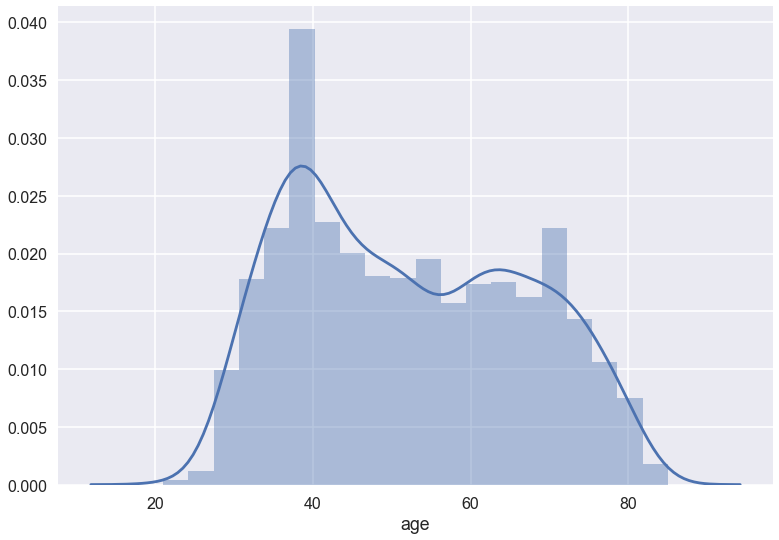

In [110]:
sns.distplot(finalx.age,kde=True) # age distribution, seems a lot 35-40 people 

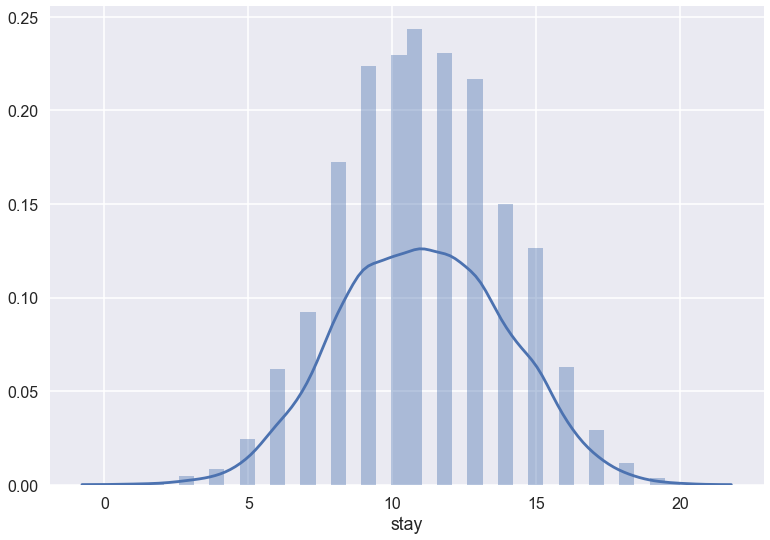

In [111]:
sns.distplot(finalx.stay,kde=True) #normal distribution, reasonable

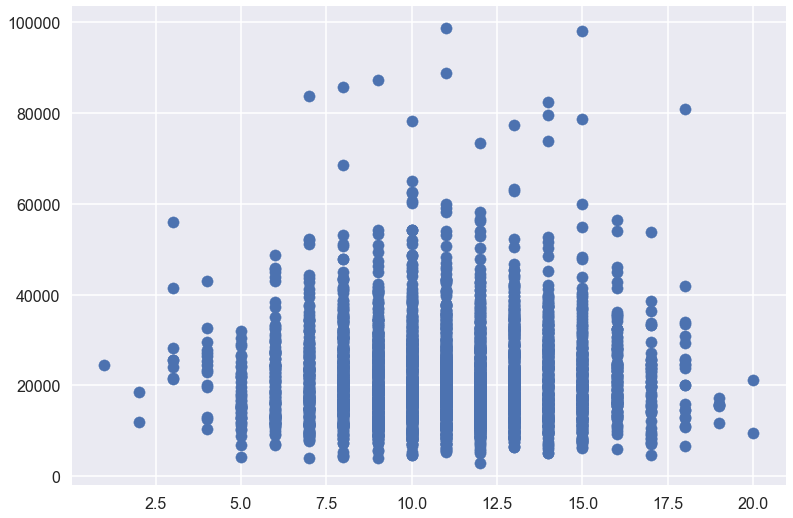

In [112]:
plt.scatter(finalx.stay,finalx.totalamt) 

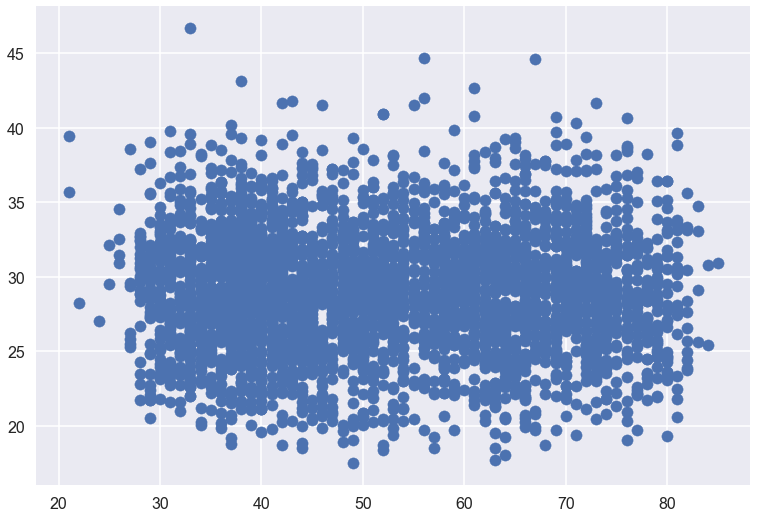

In [113]:
bmi = finalx.weight/ ((finalx.height/100)**2)#calculate BMI, and add into finalx
finalx['bmi'] = bmi
finalx.to_csv("C:/Users/FUGE/Desktop/PROJECT/finalx.csv")
plt.scatter(finalx.age, bmi) 

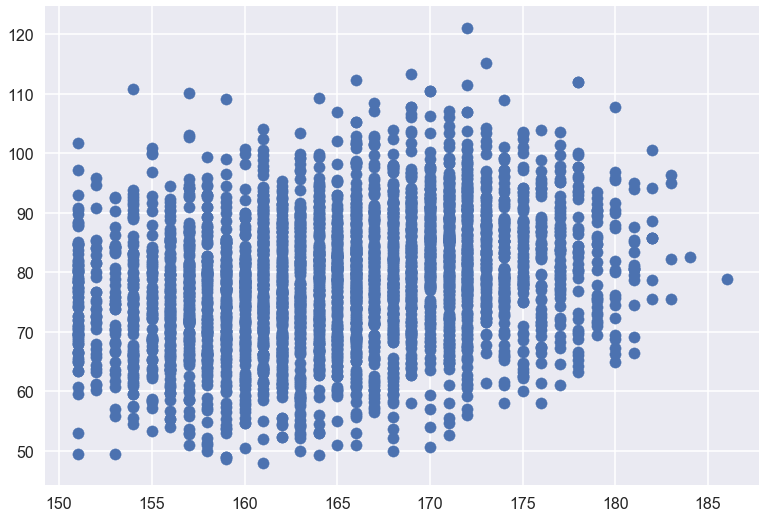

In [114]:
plt.scatter(finalx.height,finalx.weight)

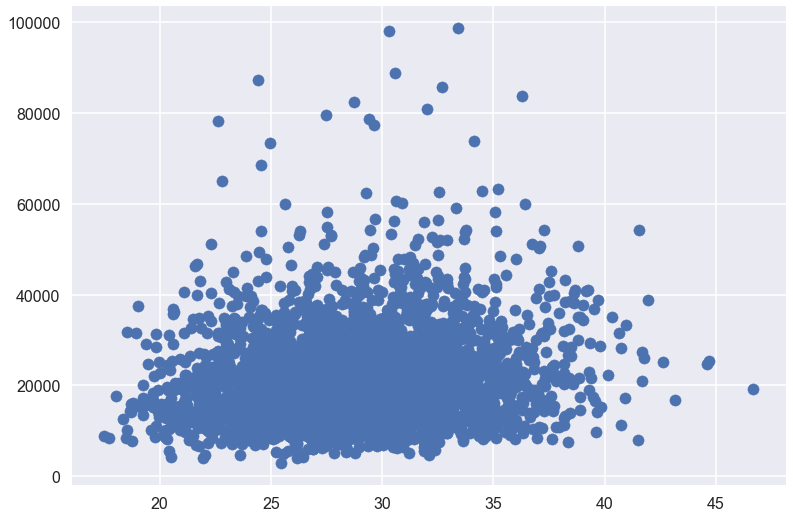

In [115]:
plt.scatter(bmi, finalx.totalamt)

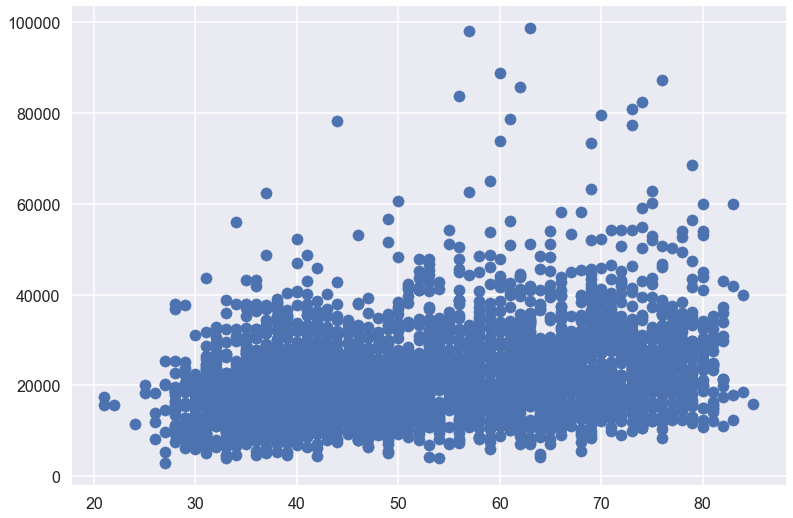

In [116]:
plt.scatter(finalx.age,finalx.totalamt) #baseline a little bit higher for higher age

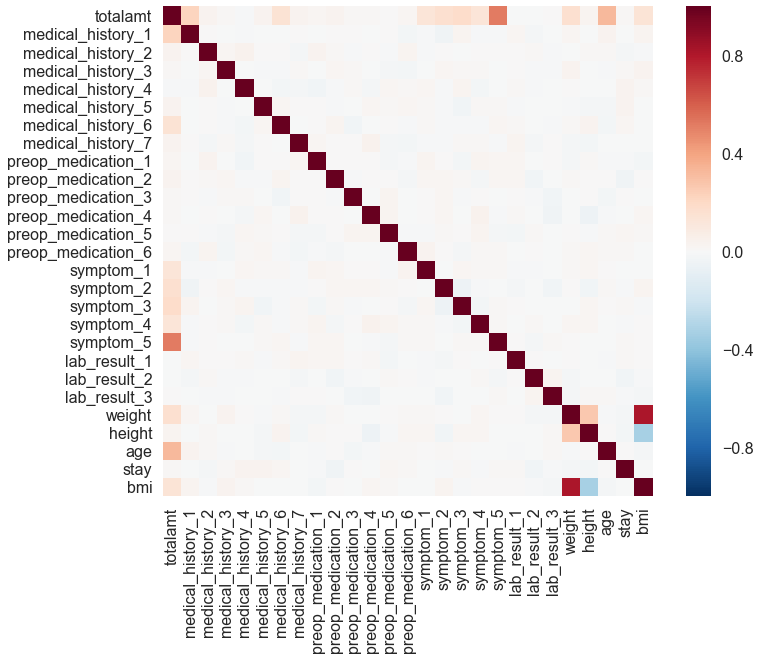

In [117]:
#lets create correlation matrix
corr = finalx.corr()
f,ax = plt.subplots(figsize=(12,9))
sns.heatmap(corr,vmax=1,square=True) #totalamt and symptom 5 higher correlation, lets plot


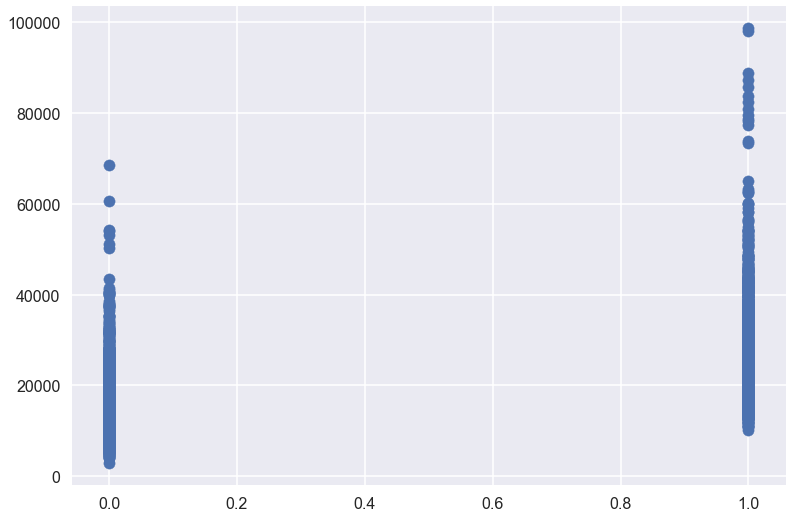

In [118]:
plt.scatter(finalx.symptom_5,finalx.totalamt) #higher when have symptom5

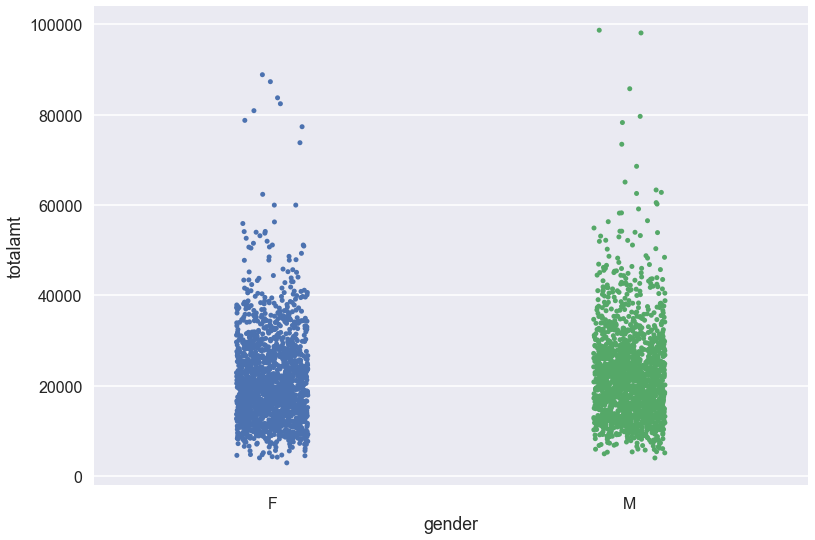

In [119]:
sns.stripplot(x = 'gender',y='totalamt',data=finalx,jitter=True)


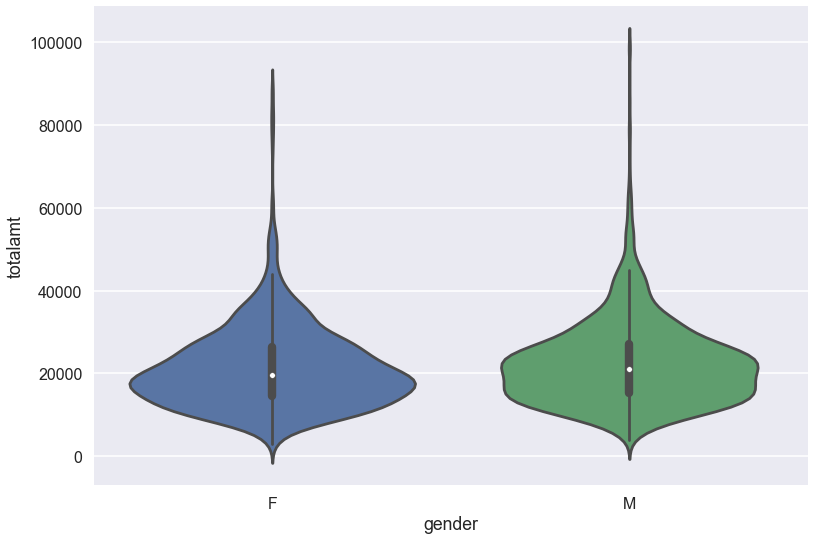

In [120]:
sns.violinplot(x = 'gender',y='totalamt',data=finalx) # a bit higher for Male

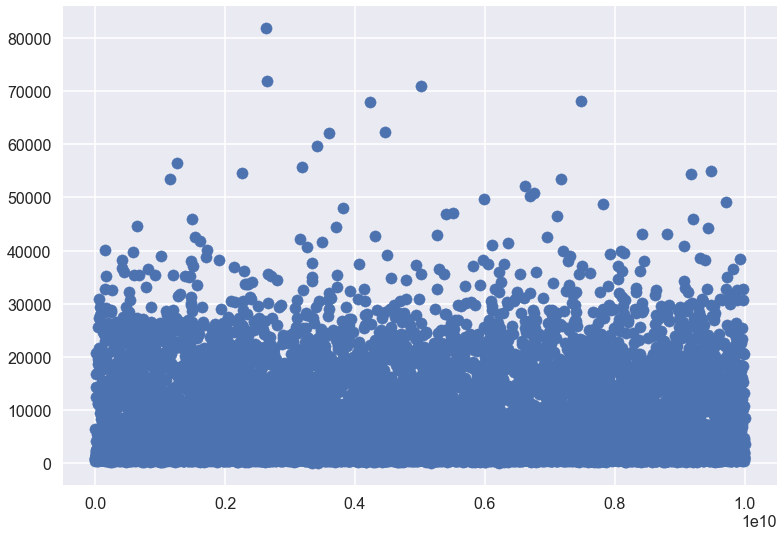

In [121]:
plt.scatter(billamt.bill_id,billamt.amount)

In [122]:
demo1 =pd.crosstab(finalx.race,finalx.gender,margins = True) #gender M,F almost same, 

In [123]:
demo1

gender,F,M,All
race,,,
Chinese,1048,1118,2166
Indian,183,161,344
Malay,369,338,707
Others,102,81,183
All,1702,1698,3400


In [124]:
demo2 = pd.crosstab(finalx.resident_status,finalx.gender, margins = True) #M,F almost same
demo2

gender,F,M,All
resident_status,,,
Foreigner,72,89,161
PR,247,268,515
Singaporean,1383,1341,2724
All,1702,1698,3400


In [71]:
demo3 = pd.crosstab(finalx.resident_status,finalx.race, margins = True) 
demo3

race,Chinese,Indian,Malay,Others,All
resident_status,,,,,
Foreigner,106,14,31,10,161
PR,338,43,109,25,515
Singaporean,1722,287,567,148,2724
All,2166,344,707,183,3400


In [72]:
billpa.head() #13600 bills, 3400 admission, seems each admission has 4 bills, to confirm

,bill_id,patient_id,date_of_admission,amount
0,7968360812,1d21f2be18683991eb93d182d6b2d220,2011-01-01,951.214467
1,6180579974,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01,19900.297086
2,7512568183,1d21f2be18683991eb93d182d6b2d220,2011-01-01,12338.269972
3,3762633379,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01,1145.372193
4,7654730355,1d21f2be18683991eb93d182d6b2d220,2011-01-01,1133.601902


In [73]:
check1 = billpa.groupby(by = ['patient_id','date_of_admission'])['amount'].count() 
check1.unique()  #confirm 

array([4], dtype=int64)

In [74]:
billpa.to_csv("C:/Users/FUGE/Desktop/PROJECT/billpa.csv")

In [75]:
finalx.columns 

Index(['patient_id', 'date_of_admission', 'totalamt', 'gender', 'race',
       'resident_status', 'date_of_birth', 'date_of_discharge',
       'medical_history_1', 'medical_history_2', 'medical_history_3',
       'medical_history_4', 'medical_history_5', 'medical_history_6',
       'medical_history_7', 'preop_medication_1', 'preop_medication_2',
       'preop_medication_3', 'preop_medication_4', 'preop_medication_5',
       'preop_medication_6', 'symptom_1', 'symptom_2', 'symptom_3',
       'symptom_4', 'symptom_5', 'lab_result_1', 'lab_result_2',
       'lab_result_3', 'weight', 'height', 'age'],
      dtype='object')

In [76]:
import datetime
import matplotlib.dates as md

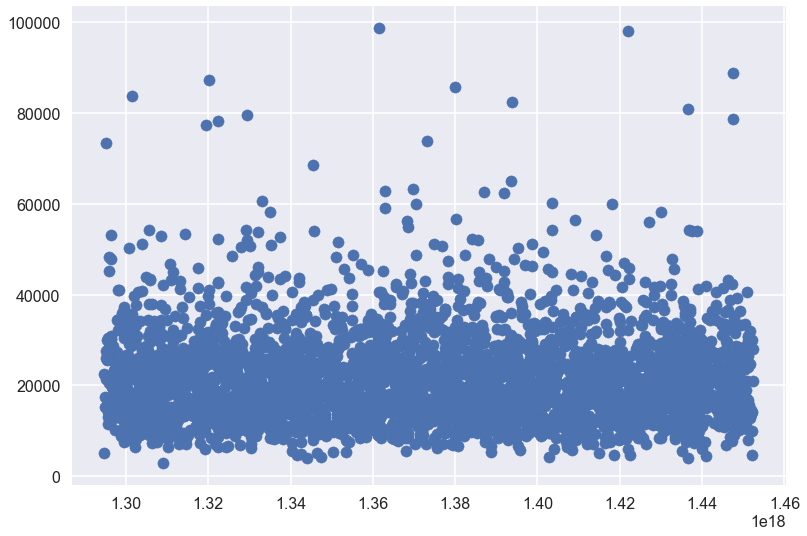

In [101]:
d1 = finalx.date_of_discharge.sort_values()
d2 = d1.to_frame()
d2.date_of_discharge = d2.date_of_discharge.astype(np.int64)
plt.scatter(d2.date_of_discharge,finalx.totalamt)

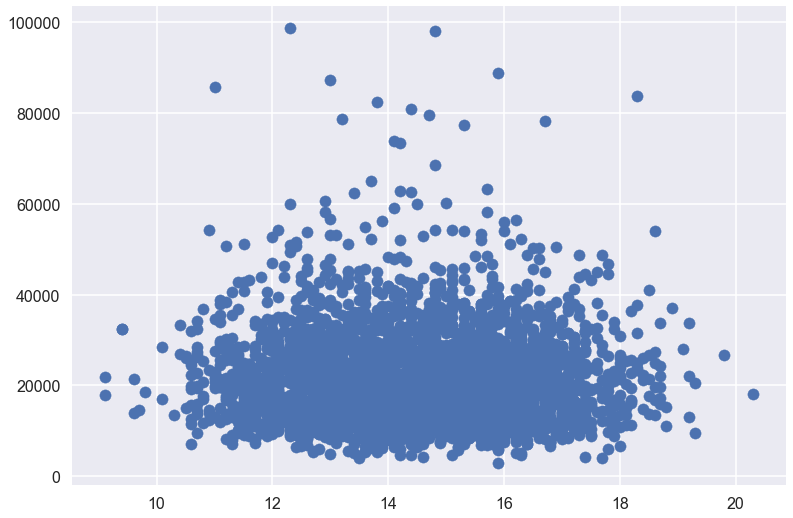

In [102]:
plt.scatter(finalx.lab_result_1,finalx.totalamt)

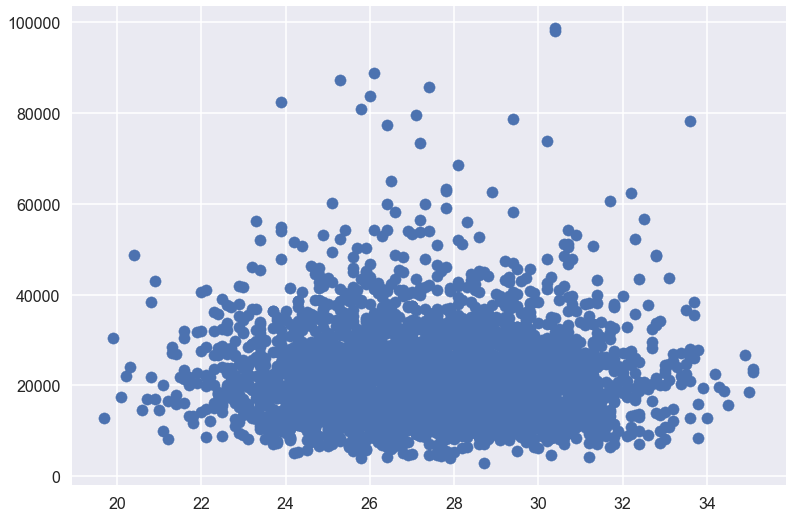

In [78]:
plt.scatter(finalx.lab_result_2,finalx.totalamt)

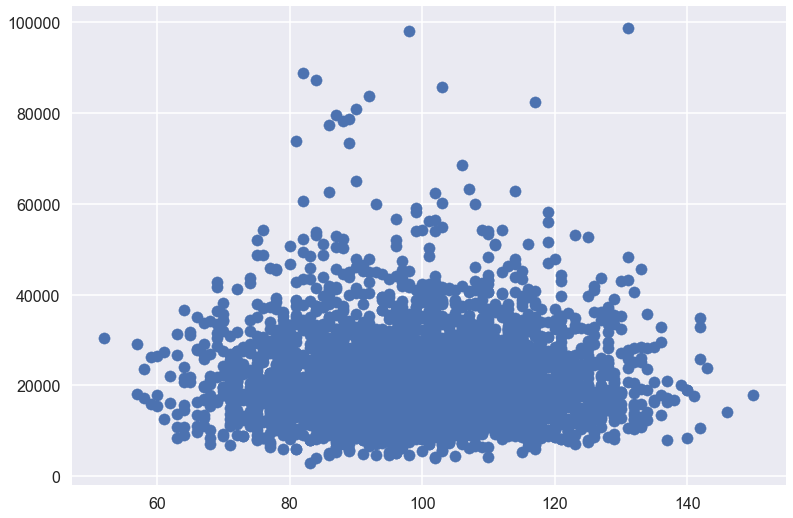

In [79]:
plt.scatter(finalx.lab_result_3,finalx.totalamt)

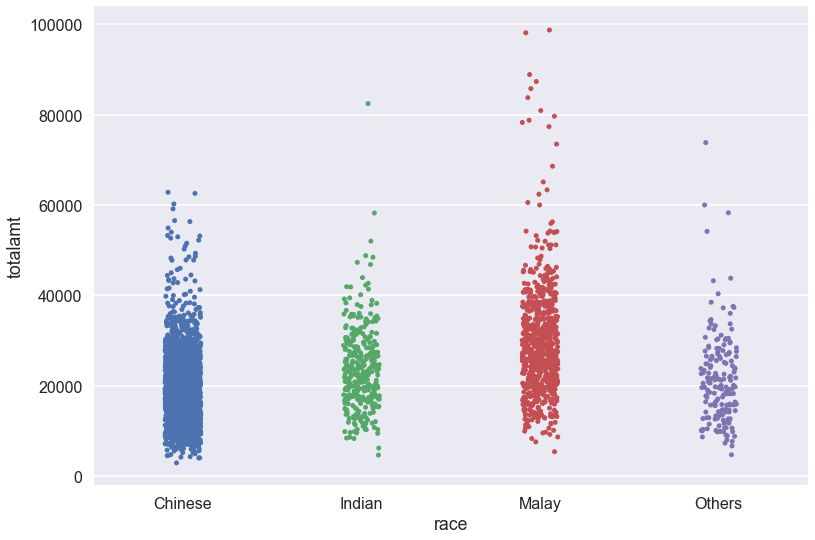

In [80]:
sns.stripplot(x = 'race',y='totalamt',data=finalx,jitter=True) #Malay has more higher value 

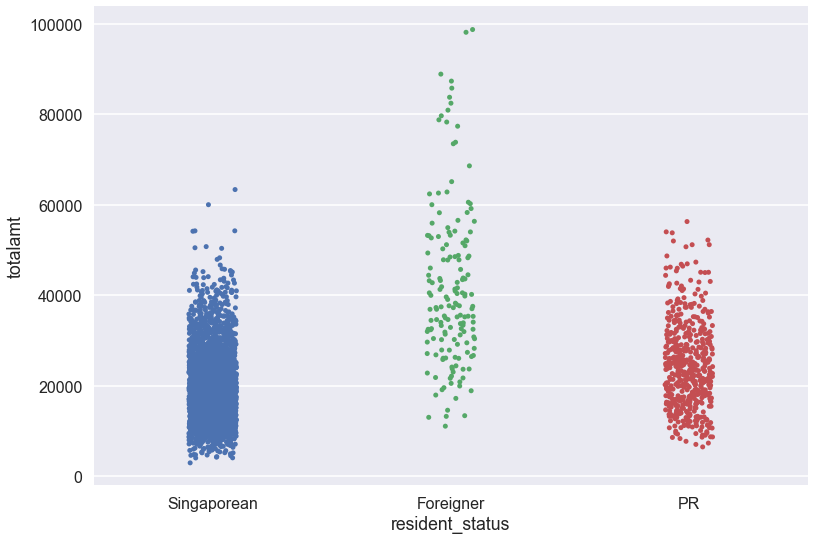

In [81]:
sns.stripplot(x = 'resident_status',y='totalamt',data=finalx,jitter=True) #Forienger higher, the PR then citizen,

In [82]:
demo3 = pd.crosstab(finalx.resident_status,finalx.race, margins = True,normalize = 'columns') 
demo3   #seems Malay has similar resident_status distribution with other race and overall data.
#need to find other reason

race,Chinese,Indian,Malay,Others,All
resident_status,,,,,
Foreigner,0.048938,0.040698,0.043847,0.054645,0.047353
PR,0.156048,0.125000,0.154173,0.136612,0.151471
Singaporean,0.795014,0.834302,0.801980,0.808743,0.801176


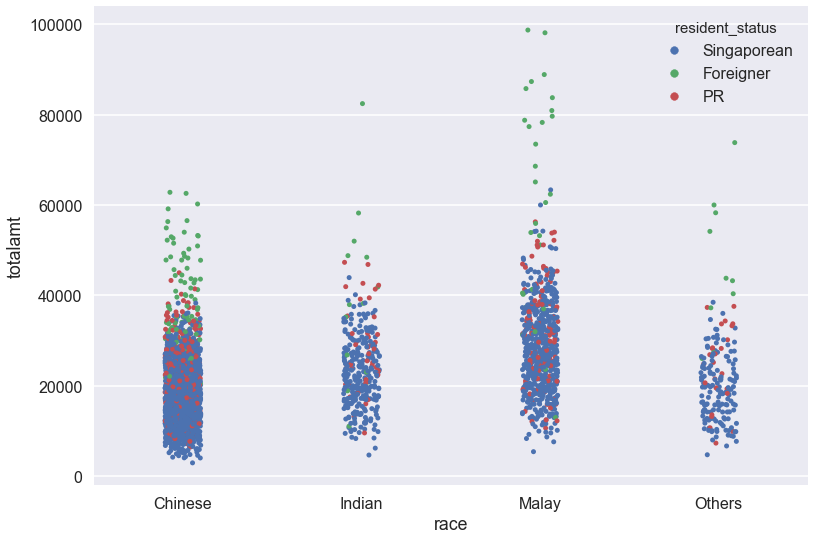

In [83]:
sns.stripplot(x = 'race',y='totalamt',hue = 'resident_status',data=finalx,jitter=True) #put these two columns together  
#Malay foreigners have much higher value 

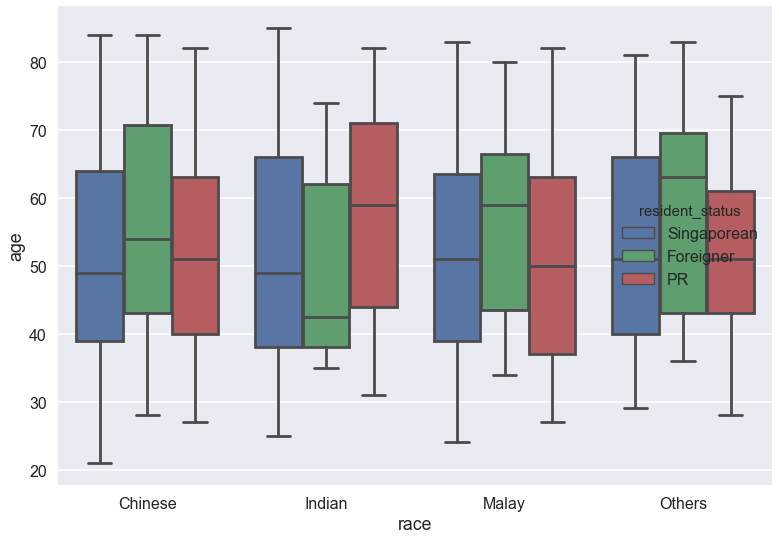

In [84]:
sns.boxplot(x = 'race',y='age',hue = 'resident_status',data=finalx) 

In [85]:
finalx.columns

Index(['patient_id', 'date_of_admission', 'totalamt', 'gender', 'race',
       'resident_status', 'date_of_birth', 'date_of_discharge',
       'medical_history_1', 'medical_history_2', 'medical_history_3',
       'medical_history_4', 'medical_history_5', 'medical_history_6',
       'medical_history_7', 'preop_medication_1', 'preop_medication_2',
       'preop_medication_3', 'preop_medication_4', 'preop_medication_5',
       'preop_medication_6', 'symptom_1', 'symptom_2', 'symptom_3',
       'symptom_4', 'symptom_5', 'lab_result_1', 'lab_result_2',
       'lab_result_3', 'weight', 'height', 'age'],
      dtype='object')

In [86]:
count1 = finalx.groupby('race').mean()
count1 = count1[['medical_history_1', 'medical_history_2', 'medical_history_3',
       'medical_history_4', 'medical_history_5', 'medical_history_6',
       'medical_history_7']]
count1

,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7
race,,,,,,,
Chinese,0.167590,0.284857,0.131117,0.053093,0.060480,0.256233,0.258079
Indian,0.156977,0.313953,0.139535,0.066860,0.049419,0.258721,0.267442
Malay,0.172560,0.292786,0.155587,0.048091,0.060820,0.253182,0.234795
Others,0.196721,0.295082,0.114754,0.027322,0.038251,0.234973,0.262295


In [87]:
count1 = count1.reset_index()

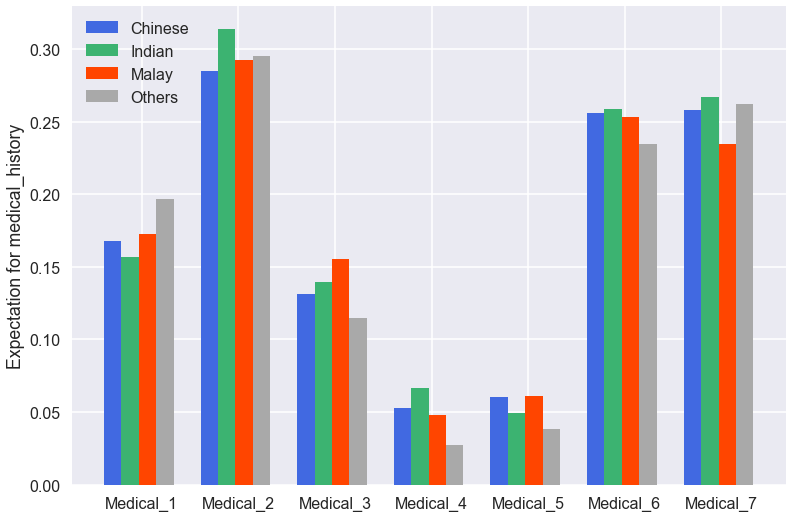

In [88]:
#use loc slice and matplotlib for drawing
N = 7

Chinese = count1.loc[0,'medical_history_1':]
Indian = count1.loc[1,'medical_history_1':]
Malay = count1.loc[2,'medical_history_1':]
Others = count1.loc[3,'medical_history_1':]

ind = np.arange(N)
width = 0.18

fig,ax = plt.subplots()
rects1 = ax.bar(ind,Chinese,width,color='royalblue')
rects2 = ax.bar(ind+width,Indian,width,color ='mediumseagreen')
rects3 = ax.bar(ind+width*2,Malay,width,color = 'orangered')
rects4 = ax.bar(ind+width*3,Others,width,color = 'darkgrey')

ax.set_ylabel('Expectation for medical_history')
ax.set_xticks(ind + 0.3)
ax.set_xticklabels(('Medical_1','Medical_2','Medical_3','Medical_4','Medical_5','Medical_6','Medical_7'))

ax.legend((rects1[0],rects2[0],rects3[0],rects4[0]),('Chinese','Indian','Malay','Others'))

In [89]:
count2 = finalx.groupby('race').mean()
count2 = count2[['preop_medication_1', 'preop_medication_2',
       'preop_medication_3', 'preop_medication_4', 'preop_medication_5',
       'preop_medication_6']]
count2

,preop_medication_1,preop_medication_2,preop_medication_3,preop_medication_4,preop_medication_5,preop_medication_6
race,,,,,,
Chinese,0.508772,0.578486,0.822715,0.516159,0.823638,0.741921
Indian,0.508721,0.630814,0.840116,0.529070,0.811047,0.741279
Malay,0.486563,0.605375,0.817539,0.548798,0.814710,0.752475
Others,0.502732,0.612022,0.775956,0.497268,0.808743,0.743169


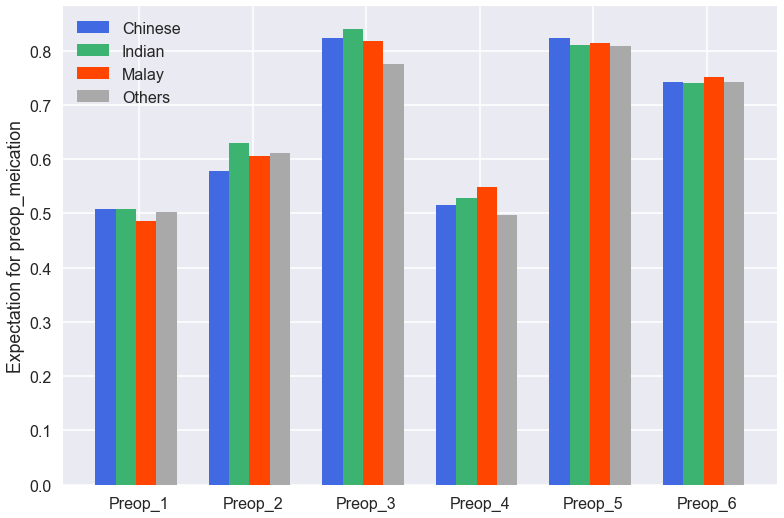

In [90]:
#use loc slice and matplotlib for drawing
N = 6

Chinese = count2.loc['Chinese',:] ##group name as index
Indian = count2.loc['Indian',:]
Malay = count2.loc['Malay',:]
Others = count2.loc['Others',:]


ind = np.arange(N)
width = 0.18

fig,ax = plt.subplots()
rects1 = ax.bar(ind,Chinese,width,color='royalblue')
rects2 = ax.bar(ind+width,Indian,width,color ='mediumseagreen')
rects3 = ax.bar(ind+width*2,Malay,width,color = 'orangered')
rects4 = ax.bar(ind+width*3,Others,width,color = 'darkgrey')

ax.set_ylabel('Expectation for preop_meication')
ax.set_xticks(ind + 0.3)
ax.set_xticklabels(('Preop_1','Preop_2','Preop_3','Preop_4','Preop_5','Preop_6','Preop_7'))

ax.legend((rects1[0],rects2[0],rects3[0],rects4[0]),('Chinese','Indian','Malay','Others'))

In [96]:
count3 = finalx.groupby('race').mean()
count3 = count3[['symptom_1', 'symptom_2', 'symptom_3','symptom_4', 'symptom_5']]
count3

,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5
race,,,,,
Chinese,0.620499,0.656510,0.544321,0.725762,0.520776
Indian,0.598837,0.697674,0.584302,0.706395,0.587209
Malay,0.616690,0.660537,0.541726,0.735502,0.519095
Others,0.661202,0.672131,0.486339,0.737705,0.513661


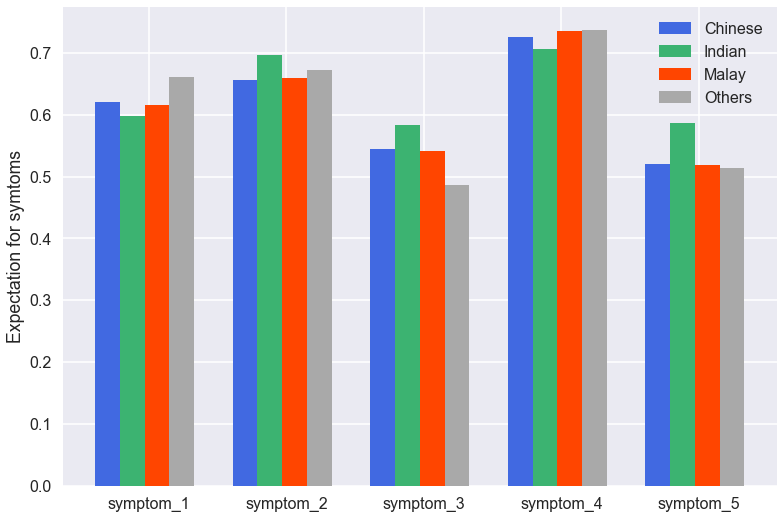

In [97]:
#use loc slice and matplotlib for drawing
N = 5

Chinese = count3.loc['Chinese',:] ##group name as index
Indian = count3.loc['Indian',:]
Malay = count3.loc['Malay',:]
Others = count3.loc['Others',:]


ind = np.arange(N)
width = 0.18

fig,ax = plt.subplots()
rects1 = ax.bar(ind,Chinese,width,color='royalblue')
rects2 = ax.bar(ind+width,Indian,width,color ='mediumseagreen')
rects3 = ax.bar(ind+width*2,Malay,width,color = 'orangered')
rects4 = ax.bar(ind+width*3,Others,width,color = 'darkgrey')

ax.set_ylabel('Expectation for symtoms')
ax.set_xticks(ind + 0.3)
ax.set_xticklabels(('symptom_1', 'symptom_2', 'symptom_3','symptom_4', 'symptom_5'))

ax.legend((rects1[0],rects2[0],rects3[0],rects4[0]),('Chinese','Indian','Malay','Others'))

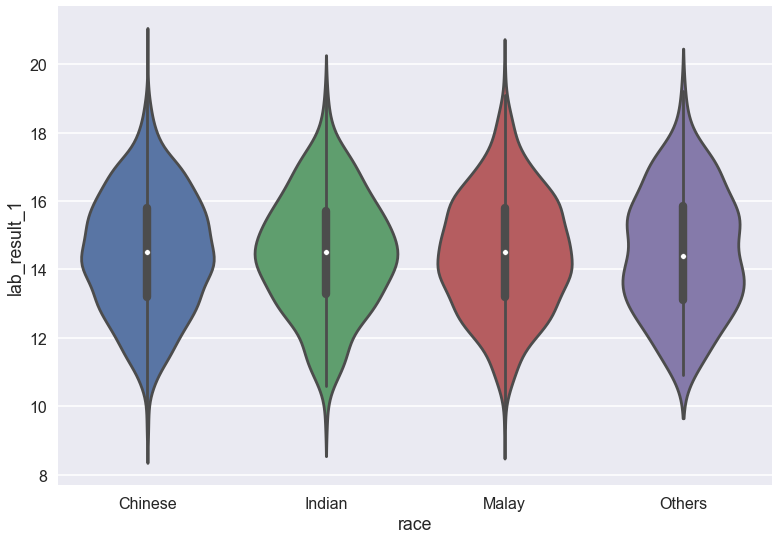

In [98]:
sns.violinplot(x='race',y = 'lab_result_1',data=finalx)#lab results 1 2 3 distribution between different races

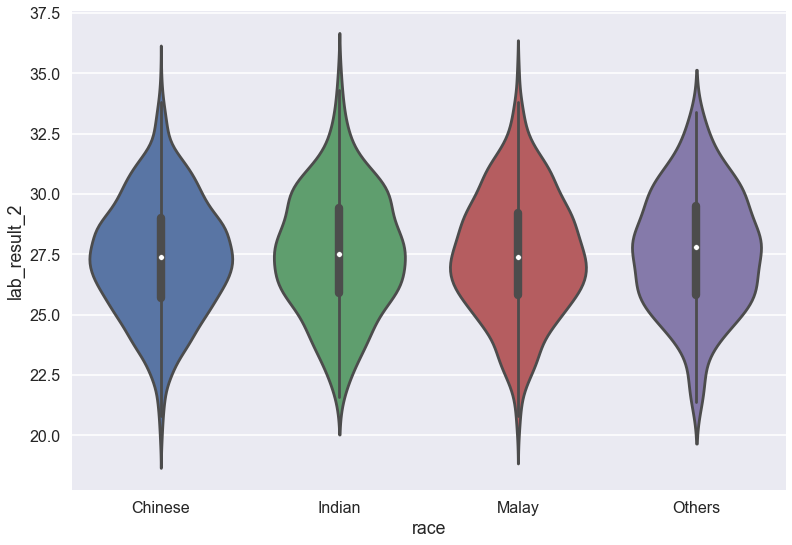

In [99]:
sns.violinplot(x='race',y = 'lab_result_2',data=finalx)

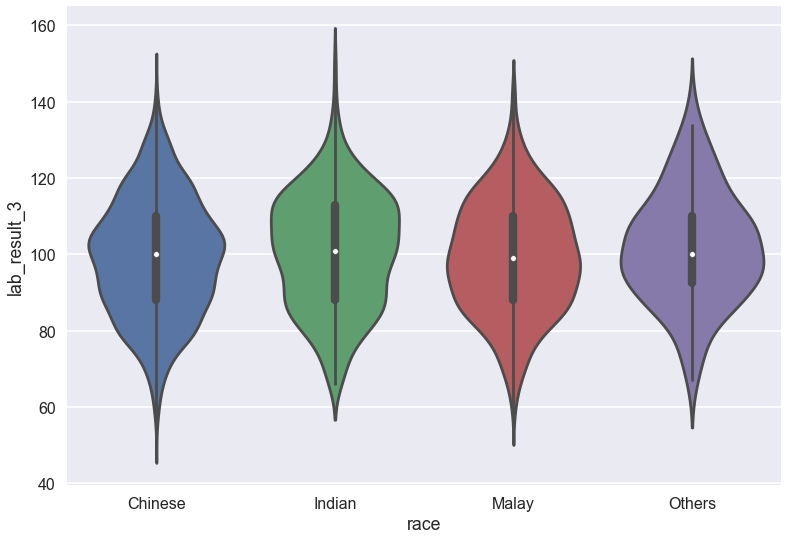

In [100]:
sns.violinplot(x='race',y = 'lab_result_3',data=finalx)

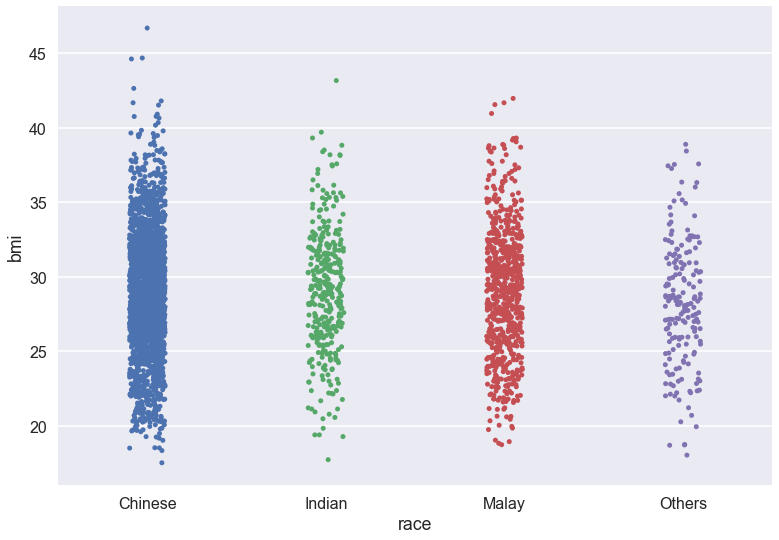

In [125]:
sns.stripplot(x = 'race',y='bmi',data=finalx,jitter=True) 

In [126]:
finalx.columns

Index(['patient_id', 'date_of_admission', 'totalamt', 'gender', 'race',
       'resident_status', 'date_of_birth', 'date_of_discharge',
       'medical_history_1', 'medical_history_2', 'medical_history_3',
       'medical_history_4', 'medical_history_5', 'medical_history_6',
       'medical_history_7', 'preop_medication_1', 'preop_medication_2',
       'preop_medication_3', 'preop_medication_4', 'preop_medication_5',
       'preop_medication_6', 'symptom_1', 'symptom_2', 'symptom_3',
       'symptom_4', 'symptom_5', 'lab_result_1', 'lab_result_2',
       'lab_result_3', 'weight', 'height', 'age', 'stay', 'bmi'],
      dtype='object')

In [132]:
finalml = finalx.drop(['date_of_birth','date_of_discharge','date_of_admission'],axis=1)

In [133]:
finalx.shape

(3400, 34)

In [134]:
finalml.shape #finalml for Machine Learning use

(3400, 31)

In [135]:
finalml.columns

Index(['patient_id', 'totalamt', 'gender', 'race', 'resident_status',
       'medical_history_1', 'medical_history_2', 'medical_history_3',
       'medical_history_4', 'medical_history_5', 'medical_history_6',
       'medical_history_7', 'preop_medication_1', 'preop_medication_2',
       'preop_medication_3', 'preop_medication_4', 'preop_medication_5',
       'preop_medication_6', 'symptom_1', 'symptom_2', 'symptom_3',
       'symptom_4', 'symptom_5', 'lab_result_1', 'lab_result_2',
       'lab_result_3', 'weight', 'height', 'age', 'stay', 'bmi'],
      dtype='object')

In [323]:

finalml.to_csv("C:/Users/FUGE/Desktop/PROJECT/finalml.csv")

In [140]:
X = finalml.drop(['patient_id','totalamt'],axis=1) #X for all the trainng features
y = finalml.totalamt

In [294]:
u = finalml.totalamt.mean()
sig = finalml.totalamt.std()

In [174]:
# Data standrization 
from sklearn import preprocessing
X_std = preprocessing.scale(X)
y_std = preprocessing.scale(y)

array([-1.6415953 ,  0.073118  , -0.43450457, ...,  0.80703913,
        0.60554104, -0.08060113])

## Start of machine learning for model

In [146]:
import xgboost as xgb  #import XGBOOST for model training
from sklearn.cross_validation import train_test_split #split for training set and test set

In [298]:
X_train, X_t, y_train, y_t = train_test_split(X_std, y_std, test_size=0.3) #70% of the examples for training

In [282]:
X_CV,X_test,y_CV,y_test = train_test_split(X_t,y_t,test_size=0.3333) #70% 20% 10% for training, cross validation, testing

In [285]:
X_train.shape

(2380, 35)

In [216]:
X_train[0,:]

array([-0.45115388, -0.63910148, -0.39704389, -0.23434543, -0.24866916,
       -0.58459573, -0.58414286, -1.00767652,  0.83159022,  0.46712029,
        0.95456066,  0.46898802,  0.5864073 ,  0.78337011,  0.71398116,
       -1.09379268, -1.62969751,  0.94782952, -0.15447747,  1.12380408,
       -1.40895691,  1.10735869,  0.70498116,  1.01799266, -0.71978148,
        0.60250581, -1.00117716,  1.00117716,  0.75479385, -0.33550774,
       -0.51237925, -0.23850639, -0.22294999,  2.36684215, -2.00738282])

In [179]:
type(y_train)

numpy.ndarray

In [166]:
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

## First model, ridge regression

In [324]:
# use sklearn ridge regression, change for different alpha and check 
alpha = np.logspace(-3,2.5,50)
for a in alpha:
    clf = Ridge(alpha = a)
    clf.fit(X_train,y_train)
    y_p = clf.predict(X_t)
    score = sum((y_p-y_t)**2)/1020
    print(a,score)

0.001 0.0625317839804
0.00129492584221 0.0625317699572
0.00167683293681 0.0625317517992
0.00217137430294 0.0625317282877
0.00281176869797 0.0625316978449
0.00364103194931 0.0625316584287
0.00471486636346 0.0625316073957
0.00610540229659 0.0625315413254
0.00790604321091 0.0625314557922
0.0102377396634 0.0625313450714
0.0132571136559 0.0625312017604
0.0171669790661 0.0625310162907
0.0222299648253 0.0625307763013
0.0287861559235 0.0625304658337
0.0372759372031 0.0625300643045
0.0482695743768 0.0625295451943
0.0625055192527 0.0625288743868
0.0809400121608 0.0625280080753
0.104811313415 0.0625268901463
0.135722878297 0.0625254489442
0.175751062485 0.0625235933248
0.227584592607 0.0625212079285
0.294705170255 0.0625181476496
0.381621340795 0.0625142313631
0.494171336132 0.0625092350866
0.639915233635 0.0625028849027
0.828642772855 0.0624948500773
1.07303094053 0.0624847367851
1.38949549437 0.0624720825037
1.79929362329 0.0624563502475
2.32995181052 0.0624369202825
3.01711481053 0.06241307507

In [325]:
clf = Ridge(alpha = 100,max_iter=1000)
clf.fit(X_train,y_train)
y_p = clf.predict(X_test)
score = sum((y_p - y_test)**2)/340
np.mean(abs(y_p - y_test))

0.18052264347908545

In [321]:
X.columns

Index(['medical_history_1', 'medical_history_2', 'medical_history_3',
       'medical_history_4', 'medical_history_5', 'medical_history_6',
       'medical_history_7', 'preop_medication_1', 'preop_medication_2',
       'preop_medication_3', 'preop_medication_4', 'preop_medication_5',
       'preop_medication_6', 'symptom_1', 'symptom_2', 'symptom_3',
       'symptom_4', 'symptom_5', 'lab_result_1', 'lab_result_2',
       'lab_result_3', 'weight', 'height', 'age', 'stay', 'bmi', 'gender_F',
       'gender_M', 'race_Chinese', 'race_Indian', 'race_Malay', 'race_Others',
       'resident_status_Foreigner', 'resident_status_PR',
       'resident_status_Singaporean'],
      dtype='object')

In [164]:
#To load a numpy array into DMatrix:


depth = [1,2,3,4,5,6]
for dep in depth:
    clf = XGBRegressor(max_depth = dep)
    test_score=np.sqrt(-cross_val_score(clf,X_trainM,y_trainM,cv=10,scoring = 'neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
plt.plot(depth,test_scores)
plt.title('max_Depth VS performance')
plt.show(
)

NameError: name 'cross_val_score' is not defined

In [326]:
u

21859.071255882372

In [327]:
sig

10155.336729373501